### Area Plot

In [1]:
%%capture
!pip3 install xlrd

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_can = pd.read_excel(
    'data/canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2
)

In [4]:
df_can.columns = list(map(lambda x: str(x), df_can.columns))

In [5]:
drops = [
    'AREA', 
    'REG', 
    'DEV', 
    'Type', 
    'Coverage'
]
df_can.drop(columns=drops, inplace=True)

In [6]:
columns = {
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region'
}

df_can.rename(columns=columns, inplace=True)

In [7]:
df_can.set_index('Country', inplace=True)

In [8]:
df_can['Total'] = df_can.sum(axis=1)

In [9]:
years = list(map(str, range(1980, 2014)))

In [10]:
df_can.sort_values('Total', ascending=False, axis=0, inplace=True)

df_top5 = df_can.head()
df_top5 = df_top5[years].transpose() 

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


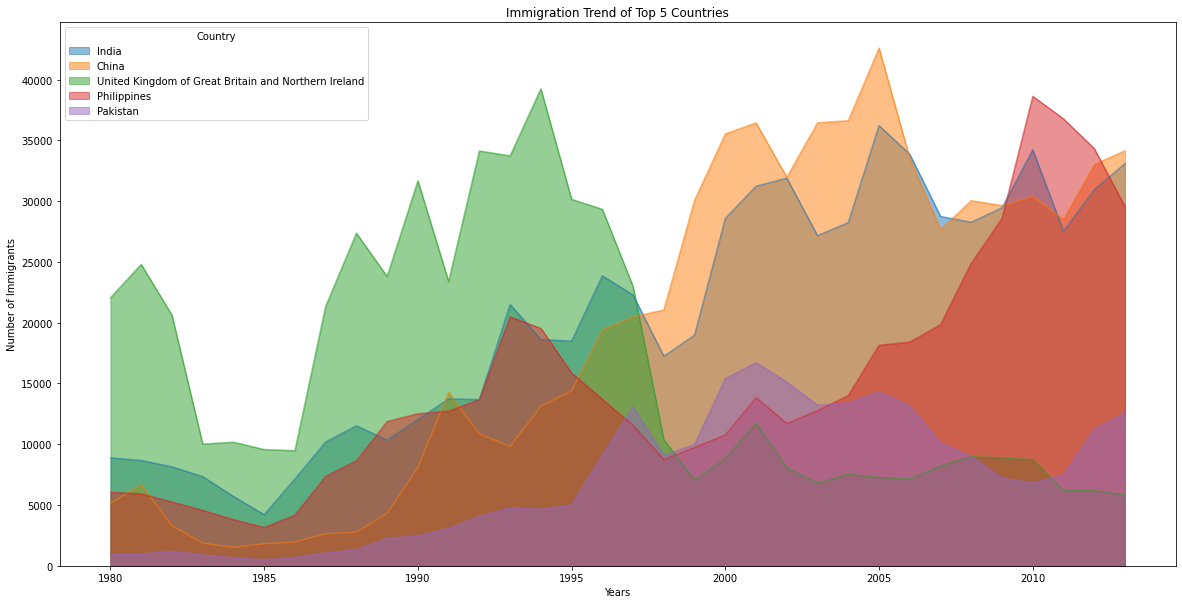

In [11]:
df_top5.index = df_top5.index.map(int)
df_top5.plot(
    kind='area', 
    stacked=False,
    figsize=(20, 10)
)

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.

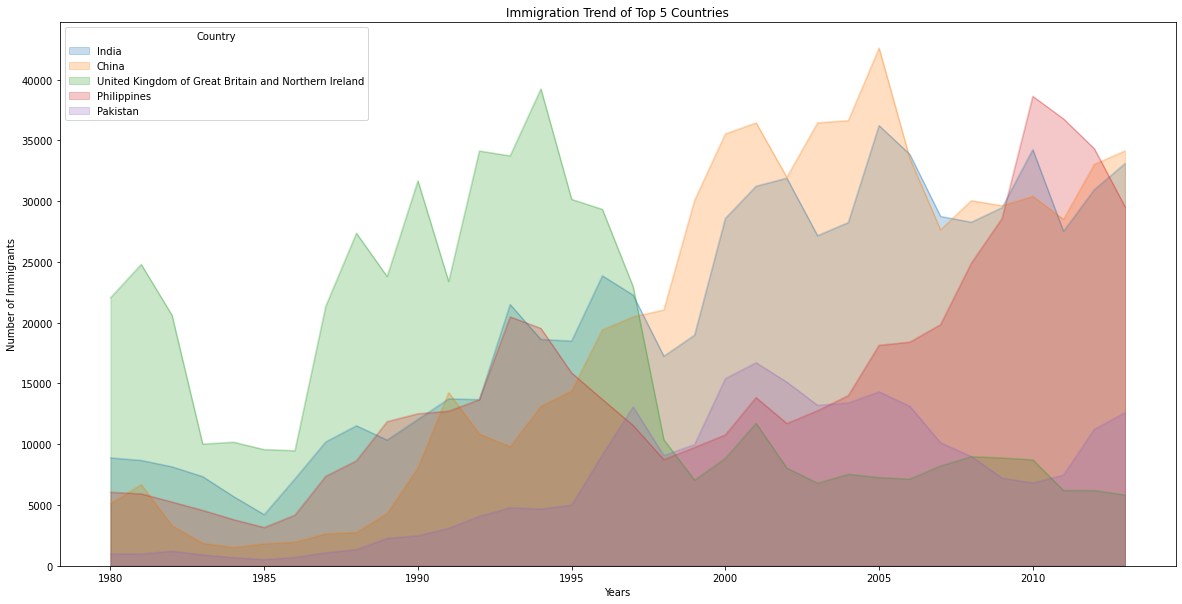

In [12]:
df_top5.plot(
    kind='area', 
    alpha=0.25,
    stacked=False,
    figsize=(20, 10),
)

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Two types of plotting

There are two styles/options of ploting with `matplotlib`. Plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as `plt`**

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # option 1: this is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```

**Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred)**

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding `*set_*` to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis. 

This option sometimes is more transparent and flexible to use for advanced plots. 

```python
    # option 2: preferred option with more flexibility
    ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

    ax.set_title('Immigration Trend of Top 5 Countries')
    ax.set_ylabel('Number of Immigrants')
    ax.set_xlabel('Years')
```